In [19]:
import os
os.getcwd()

'C:\\Users\\OM3D\\Desktop\\4_model'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

O:\anaconda3\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
### Preparing DATA
# Load dataset into a pandas dataframe
df = pd.read_csv('rmsds.txt',names=['pair','obs_contact','rmsd'])
df['pdb_id'] = df['pair'].apply(lambda x: x.split('_')[0])

In [3]:
proteosome = df[(df['pdb_id']=='5LE5')]
#proteosome['pair2'] = proteosome['pair'].apply(lambda x: x.split('_')[1])+'_'+proteosome['pair'].apply(lambda x: x.split('_')[3])
T_proteosome = proteosome[(proteosome['obs_contact']>10) ]
TP_proteosome = T_proteosome[(T_proteosome['rmsd']<3)]
print ('Proteosome: We have',len(T_proteosome),'Interacting pairs,',len(TP_proteosome),'pairs are predicted correctly')
#T_proteosome[(T_proteosome['pair'].str.contains('_A'))]

Proteosome: We have 34 Interacting pairs, 28 pairs are predicted correctly


In [4]:
T_df = df[df['obs_contact']>10]
TP_df = T_df[T_df['rmsd']<3]
print ('Overal: We have',len(T_df),'Interacting pairs,',len(TP_df),'pairs are predicted correctly')

Overal: We have 797 Interacting pairs, 422 pairs are predicted correctly


O:\anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Contact Residue Count')

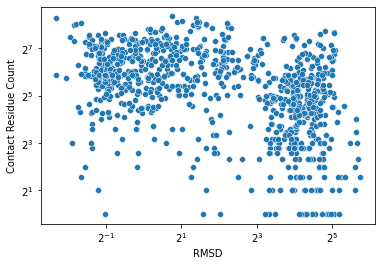

In [5]:
sns.scatterplot(df[df['obs_contact']<400]['rmsd'],df[df['obs_contact']<400]['obs_contact'])
plt.yscale('log',base=2)
plt.xscale('log',base=2)
plt.xlabel('RMSD')
plt.ylabel('Contact Residue Count')

In [11]:
df = pd.read_csv('TMscores.txt',names=['pair','obs_contact','tmscore'])
df['rank'] = df['pair'].apply(lambda x: x.split('_')[-1])
df['pair'] = df['pair'].apply(lambda x: x[:-2])
df[df['pair'].str.contains('5LE5')]

,pair,obs_contact,tmscore,rank
1910,5LE5_A_5LE5_B,101,0.907,0
1911,5LE5_A_5LE5_B,101,0.906,1
1912,5LE5_A_5LE5_B,101,0.971,2
1913,5LE5_A_5LE5_B,101,0.966,3
1914,5LE5_A_5LE5_B,101,0.958,4
...,...,...,...,...
2110,5LE5_G_5LE5_H,24,0.951,0
2111,5LE5_G_5LE5_H,24,0.941,1
2112,5LE5_G_5LE5_H,24,0.953,2
2113,5LE5_G_5LE5_H,24,0.951,3


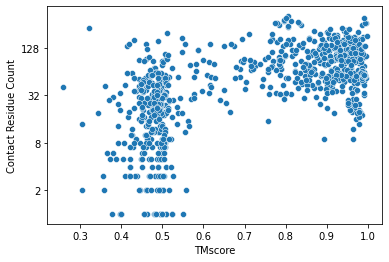

In [8]:
sns.scatterplot(x=df[(df['obs_contact']<400) & (df['rank']=='0')]['tmscore'],y=df[(df['obs_contact']<400) & (df['rank']=='0')]['obs_contact'])
plt.xlabel('TMscore')
plt.yscale('log',base=2)
plt.ylabel('Contact Residue Count')
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())

In [9]:
df = df.sort_values('tmscore', ascending=False)
df_best = df.drop_duplicates(subset='pair', keep='first')
df_best = df_best.reset_index(drop=True)
df_best

,pair,obs_contact,tmscore,rank
0,3U7Q_B_3U7Q_B,180,0.999,4
1,4GYP_A_4GYP_A,102,0.997,2
2,4WHS_A_4WHS_B,263,0.997,0
3,5LE5_L_5LE5_I,54,0.996,0
4,1WYU_A_1WYU_B,667,0.996,0
...,...,...,...,...
838,7XUF_B_7XUF_B,3,0.370,3
839,6WGF_5_6WGF_4,2,0.359,0
840,7KEU_A_7KEU_A,19,0.348,2
841,7VRT_aa_7VRT_aa,232,0.325,3


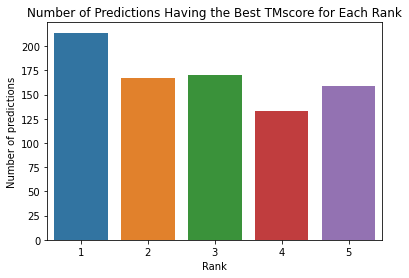

In [106]:
rank_counts = df_best.groupby('rank').size()

# Create a bar plot
sns.barplot(x=[1,2,3,4,5], y=rank_counts.values)

# Set labels and title
plt.xlabel('Rank')
plt.ylabel('Number of predictions')
plt.title('Number of Predictions Having the Best TMscore for Each Rank')

# Show the plot
plt.show()

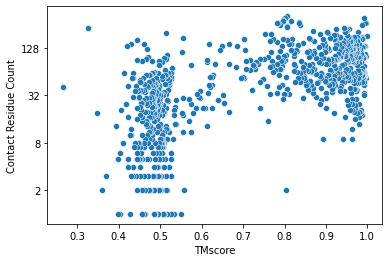

In [98]:
sns.scatterplot(x=df_best[(df_best['obs_contact']<400)]['tmscore'],y=df_best[(df_best['obs_contact']<400)]['obs_contact'])
plt.xlabel('TMscore')
plt.yscale('log',base=2)
plt.ylabel('Contact Residue Count')
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())

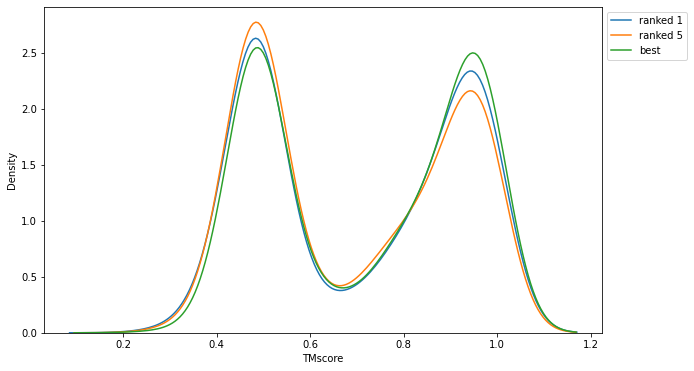

In [90]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[(df['obs_contact']<400) & (df['rank']=='0')]['tmscore'],label='ranked 1')
#sns.kdeplot(df[(df['obs_contact']<400) & (df['rank']=='1')]['tmscore'],label='ranked 2')
#sns.kdeplot(df[(df['obs_contact']<400) & (df['rank']=='2')]['tmscore'],label='ranked 3')
#sns.kdeplot(df[(df['obs_contact']<400) & (df['rank']=='3')]['tmscore'],label='ranked 4')
sns.kdeplot(df[(df['obs_contact']<400) & (df['rank']=='4')]['tmscore'],label='ranked 5')
sns.kdeplot(df_best[(df_best['obs_contact']<400)]['tmscore'], label='best')
plt.xlabel('TMscore')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

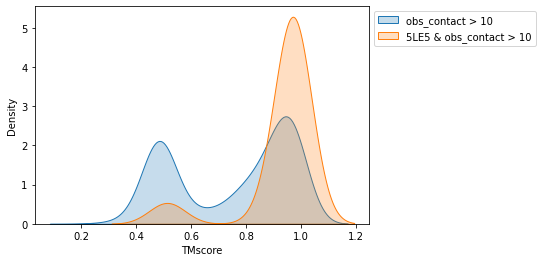

In [115]:
sns.kdeplot(df[(df['obs_contact']>10) & (df['rank']=='0')]['tmscore'],shade=True,label='obs_contact > 10')
sns.kdeplot(df[(df['obs_contact']>10) & (df['rank']=='0') & (df['pair'].str.contains('5LE5'))]['tmscore'],shade=True,label='5LE5 & obs_contact > 10')
plt.xlabel('TMscore')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

54


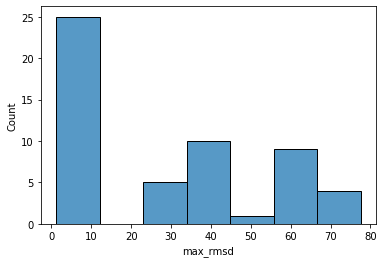

In [15]:
df = pd.read_csv('trimer_rmsds.txt',names=['trimer','max_rmsd','ptm'])[1:]
df['max_rmsd'] = df['max_rmsd'].astype(float)
sns.histplot(df['max_rmsd'])
print (len(df))